In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [2]:
## TODO ##

# Review Code and avoid pixel values, convert to axis values
    # Change buffer in show X/Y to be in ax values
# Display X/Y ToDos:
    # TODO: Figure out how to subtract out the height of the text as well!
    # TODO: Center X vals by subtracting string length. Add flag if it runs into next bar
    # TODO: Change text color based on data color IF inside_data
# Make all graph attribute/widths in relation to how dense the chart is (?)
# Review Cards Creates:
#
#
# Fix line highlight to be sections/segment for consecutive points, 
# Fix highlight circles to be axis points 
# Make line width conditional on relationship to number of points
# "smooth" line easy flag
# port over interpolate in prep for labelling
# label function
# ...
# Figure out easy font control
# Add "hide_border" function to hide right/top if needed
# Add flag for whether X/Y values are being displayed in graph for interpolate
# make "caption" that does lazy captioning (waits until display to calculate where to put caption)
# make "force_caption" to be called right before showing AND to use if user wants caption to potentially be blocked
# Treat titles + subtitles like captions, since they can interfere with data point value displays + captions as well
# Y Data point display that is bottom of chart + outside data will overlap with X data
# Clean up the fact that display_x and display_y are so similar and likely can be consolidated

In [3]:
## Why Datastory? ##
## Basic Plots are either quick and ugly, or long winded and complicate for both analyst and decision maker 
## Basic Plots make captions, highlights, brackets, delineates really challenging, or you need to do so in PPT
## Basic Plots make Smart Titles (Colored by graph color) is Frustrating
## Basic Plots make using multiple axes a pain
## Basic Plots make using fonts a pain (Can I help with custom font useage?)

## Datastory creates powerful & elegant charts in 7 lines or less

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

class data_story():
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    
    ##############################
    ### BASIC INIT + STYLING #####
    ##############################
    
    def __init__(self, style='default', font='default', size=[18.5,10.5]):
        
        
        # Quick Checks:
        if type(size) != list:
            raise TypeError("Please pass in a length 2 List for Size instead of ".format(type(size)))
        elif len(size) != 2:
            raise IndexError("Please pass in a length 2 List for Size instead of length ".format(len(size)))
        
        # TODO: Once I add plotly/seaborn integrations, add a backend parameter
        self.plotter = 'matplot'
        
        # Only handles one plotting area at a time
        f, ax = plt.subplots(1)
        f.set_size_inches(size[0],size[1])
        
        # Containers for X & Y data & names for easier access
        self.x_data = []
        self.y_data = []
        self.chart_name_list = []
        self.chart_type_list = []
        self.fig = f
        self.chart = ax
        
        # Set Style
        # Set fonts, which have to be done before creating plots for some reason in mpl
        if style == 'default':
            self.color_list = self.default_style()
        else:
            raise NameError('Unknown Style Type {}'.format(style))
            
        if font == 'default':
            self.default_font()
        else:
            raise NameError('Unknown Style Type {}'.format(style))
    
    def default_font(self):
        pass
        
#         SMALL_SIZE = 16
#         MEDIUM_SIZE = 22
#         BIGGER_SIZE = 26
        
#         # Font Manager is a serious pain. 
#         mpl.rcParams['font.family'] = 'Futura'

#         plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#         plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
#         plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
#         plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#         plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#         plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#         plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    def default_style(self):
        
        # Remove box lines and ticks
        self.chart.spines['top'].set_visible(False)
        self.chart.spines['right'].set_visible(False)
        self.chart.tick_params(axis=u'both', which=u'both',length=0)
        color_list = ['#3F784C','#003D73','#C05640','#CAC4CE']
        return(color_list)
        

    ##############################
    ### SIMPLE DISPLAY + HIDE ####
    ##############################
    
    def hide_y_values(self):
        # Goal: This function should hide the y axis and values
        
        self.chart.set_yticks([])
        self.chart.spines['left'].set_visible(False)
        
    def hide_x_values(self):
        # Goal: This function should hide the x axis and values
        
        self.chart.set_xticks([])
        self.chart.spines['bottom'].set_visible(False)
  
    ####################################################################
    ####################################################################
    ####################################################################
    ####################################################################
    def display_y_values(self, buffer=None, hide_ticks=True, inside_data=True, top_of_chart=True, name=None):
        # Goal: This function should display Y values over the datapoints
        
        x,y,chart_type = self.pull_data(name)
        
        if not buffer:
            buffer = 0.005
        ## TODO: Figure out how to subtract out the height + width of the text as well!
        
        for i in range(len(x)):
            if type(x[i]) == str:
                old_x = i
            else:
                old_x = x[i]
            n_x, n_y = self.chart.transLimits.transform((old_x,y[i]))
            if top_of_chart:
                if inside_data:
                    n_y -= buffer
                else:
                    n_y += buffer
            else:
                n_y = 0
                if inside_data:
                    n_y += buffer
                else:
                    n_y -= buffer
                
            self.chart.annotate(y[i],xy=(n_x,n_y), xycoords='axes fraction')
        
        if hide_ticks:
            self.hide_y_values()
        
    def display_x_values(self, buffer=None, hide_ticks=True, inside_data=True, top_of_data=True, name=None):
        
        x,y,chart_type = self.pull_data(name)
        
        if not buffer:
            buffer = 0.005
        
        for i in range(len(x)):
            if type(x[i]) == str:
                old_x = i
            else:
                old_x = x[i]
                
            string_val = str(x[i])
            offset_pxl = self.center_text(string_val)
#             offset_ax = self.chart.transAxes.inverted().transform(offset_pxl)
            
            data_coord = (old_x,y[i])
            pxl_coord = self.chart.transData.transform(data_coord)
            print(pxl_coord)

            # Handle X Value (adjust width)
            pxl_coord[0] -= offset_pxl[0]/2
            
            # Handle Y Value (adjust height )
            
            # If inside data, remove height so it doesn't interfere with data
            ## TODO: Change Color of Text
            if chart_type == 'bar':
                if inside_data:
                    if top_of_data:
                        pxl_coord[1] -= offset_pxl[1]
                    else:
                        pxl_coord[1] += offset_pxl[1]
            elif chart_type == 'line':
                x = 5
            else:
                raise TypeError('You should never see this error. We received the wrong kind of chart type ({})'.format(chart_type))
                    
            
            ax_coord = self.chart.transAxes.inverted().transform(pxl_coord)
            
            # Reset values are bottom to bottom
            ## ISSUE: this loses the height offset (which is in pixels)
            if (chart_type == 'bar') and not top_of_data:
                ax_coord[1] = 0
        
        
            # AND gate to see which direction buffer is
            if top_of_data == inside_data:
                ax_coord[1] -= buffer
            else:
                ax_coord[1] += buffer
                
            
#             self.chart.annotate(string_val, (n_x, n_y), ha='center', xycoords='axes fraction')
            self.chart.annotate(x[i],xy=ax_coord, xycoords='axes fraction')
        
        if hide_ticks:
            self.hide_x_values()
      
    # TODO: Hide X/Y Axis and/or ticks helper functions
    
    ####################################################################
    ####################################################################
    ####################################################################
    ####################################################################
    
    ##############################
    ### CHART GENERATE FUNCS #####
    ##############################    
    
    # Generate Line Graph
    def line(self,x,y, name=None, color=None, marker_size=None, marker_type=None, line_width=5, line_style='-'):
         ## TODO, add parameters for each potential helper function
           
        if not color:
            c =  self.color_list[len(self.chart_name_list)]
        else:
            c = color
            
        if marker_size and not marker_type:
            marker_type = 'o'
        if marker_type and not marker_size:
            marker_size = 10
            
        self.chart.plot(x,y, color=c, markersize=marker_size, marker=marker_type, linewidth=2, linestyle=line_style)
        
        self.x_data.append(x)
        self.y_data.append(y)
        
        if name:
            chart_name = name
            self.chart_name_list.append(name)
        else:
            chart_name = 'unnamed_{}'.format(len(self.chart_name_list)+1)
            
        self.chart_name_list.append(chart_name)
        self.chart_type_list.append('line')
        

       
    # Generate Bar Graph
    def bar(self,x,y, name=None, color=None):
        
        if not color:
            c =  self.color_list[len(self.chart_name_list)]
        else:
            c = color
        self.chart.bar(x,y,color=c)
        
        self.x_data.append(x)
        self.y_data.append(y)
        
        if name:
            chart_name = name
            self.chart_name_list.append(name)
        else:
            chart_name = 'unnamed_{}'.format(len(self.chart_name_list)+1)
            
        self.chart_name_list.append(chart_name)
        self.chart_type_list.append('bar')
        
        return(self)
      
    # Generate Pie Graph
    def pie(self,slices,perc, name=None):
        self.x_data.append(slices)
        self.y_data.append(perc)
        
        if name:
            chart_name = name
            self.chart_name_list.append(name)
        else:
            chart_name = 'unnamed_{}'.format(len(self.chart_name_list)+1)
            
        self.chart_name_list.append(chart_name)
        self.chart_type_list.append('pie')
            
        self.chart.pie(perc,labels=slices)
    
    ##############################
    ####### ANNOTATIONS ##########
    ##############################
    
    ## Highlight
    def highlight(self, points, x_provided=True, name=None, color='#FFB20F', filled=True):
        
        # Goal: This function should take in a list of data points and recolor/emphasize
        #       those data points 
        
        # points        the data points to highlight
        # x_provided    if the "points" refers to X values or not
        # name          name of dataset
        # color         color of highlight (default orange yellow)
        # filled        if want highlight to be filled or just an outline
        #                  For Bars: if the bar is filled out outlined
        #                  For Lines: 
        #                     if consecutive points: the section of graph is highlighted 
        #                                          or the line itself is highlighted
        #                     If single point: the circle around graph is filled out just outline
        
        
        # Pull X, Y data and chart type
        x,y,chart_type = self.pull_data(name)
        
        
        
        ## Change points into list for easy usage
        if not isinstance(points, list):
            points = [points]
        
        
        # If x vals provided:
        if x_provided:
            hl_x = points
            hl_y = [y[x.index(i)] for i in points]
        # If y vals provided
        else:
            hl_y = points
            hl_x = [x[y.index(i)] for i in points]
            
        # If X values are categorical, find numerical base
        # Also find magnitude of X axis
        if isinstance(hl_x[0],str):
                hl_x = [x.index(i) for i in hl_x]
                x_mag = len(x)
        else:
            x_mag = max(x) - min(x)
        y_mag = max(y) - min(y)
        
        bottom = self.chart.get_ylim()[0]
        
        
        
        
        # Iterate through all points to highlight
        for i in range(len(points)):
            x_val = hl_x[i]
            y_val = hl_y[i]
            
            # If highlighting bar chart...
            if chart_type == 'bar':
                
                # Add colored rectangle over bar value
                width = self.chart.patches[i].get_width()
                bottom_left = (x_val-width/2,bottom)
                height = y_val-bottom
                rect = mpl.patches.Rectangle(xy=bottom_left,width=width, height=height,
                                             fill=filled, color=color, lw=5)
                self.chart.add_patch(rect)
                
            # If highlighting a line chart...
            elif chart_type == 'line':
                
                # Circle each point
                xmin, xmax, ymin, ymax = plt.axis()
                
                width = (xmax-xmin)*0.05
                height = (ymax-ymin)*0.05

                circ = mpl.patches.Ellipse((x_val,y_val), width=width, height=height, fill=filled, color=color)
                    
                self.chart.add_artist(circ)
                
                ## TODO: How to handle if multiple points are next to each other or not
                ## A flag that says to connect the points?
            
            elif chart_type == 'pie':
                continue
                
                
    
    ## TODO: Label
    def label(self, text, font_size=16):
        pass
    
    ## TODO: Bracket
    
    ## TODO: Delineate
    
    ## TODO: Explode (maybe)
    
    def caption(self, text, font_size=16):
        ## TODO: Add flag that if the XAxis is hidden, move the caption up
        plt.figtext(0.5, 0.01, text, wrap=True, horizontalalignment='center', fontsize=font_size)
     
    def title(self, test, font_size=15):
        self.chart.set_title(test)
        
    ##############################
    ########### GETTERS ##########
    ##############################   
    
    # Return X Data
    def get_x_data(self, name=None):
        
        # If a specific dataset is not called out...
        if not name:
            
            # If there is only one dataset, return it
            # Else return all
            if len(self.x_data) == 1:
                return(self.x_data[0])
            else:
                return(self.x_data)
        
        else:
            i = self.chart_name_list.index(name)
            return(self.x_data[i])
        
    # Return Y Data
    def get_y_data(self, name=None):
        
        # If a specific dataset is not called out...
        if not name:
            
            # If there is only one dataset, return it
            # Else return all
            if len(self.y_data) == 1:
                return(self.y_data[0])
            else:
                return(self.y_data)
        
        else:
            i = self.chart_name_list.index(name)
            return(self.y_data[i])
        
    def get_data(self, name=None):
        return(self.get_x_data(name=name),self.get_y_data(name=name))
    
    def get_plot(self):
        return(self.chart)
    
    def get_data_names(self):
        return(self.chart_name_list)
    
    def get_fonts_available(self):
        return([f.name for f in mpl.font_manager.fontManager.ttflist])
    
    def show_fonts_available(self):
        import warnings
        warnings.filterwarnings("ignore")
        
        # Get Fonts 
        fonts = sorted([f.name for f in mpl.font_manager.fontManager.ttflist], reverse=True)
 
        # Extend plot to fit all the fonts
        plt.gcf().set_size_inches(5, len(fonts)/3)
        plt.plot([0,0],[0,len(fonts)])
        plt.xlim(left=0)
        plt.gca().axis('off')
        plt.title('Fonts Available')
        
        # Write the name + the style
        for i in range(len(fonts)): 
            plt.text(0,i,'{}:'.format(fonts[i]), fontdict={'size':12})
            plt.text(0.05,i,fonts[i], fontdict={'family':fonts[i], 'size':12})
        plt.show()
    
    ##############################
    ####### MISC. HELPERS ########
    ############################## 
    
    def pull_data(self, name):
        ## This function takes in either None of a string and returns the data related to that value
        num_datasets = len(self.chart_name_list)
        if num_datasets != 1:
            if num_datasets == 0:
                raise ValueError("No datasets to highlight")
            elif not name:
                raise ValueError("""Please specify name of dataset you would like to highlight. 
                To find out the name of the imported datasets, use .get_data_names()""")
            else:
                chart_name = name
        else:
            chart_name = self.chart_name_list[0]
               
        # Pull Data
        x,y = self.get_data(name=chart_name)
        chart_type = self.chart_type_list[self.chart_name_list.index(chart_name)]
        
        return(x,y,chart_type)
    
    def center_text(self, string):
        
        # This function takes in a string and returns how long it is
        import matplotlib as mpl
        import matplotlib.font_manager as f
        from PIL import ImageFont
        
        fam = mpl.rcParams['font.family']
        ttf = f.findfont(f.FontProperties(family=fam))
        pxls = ImageFont.truetype(ttf, int(mpl.rcParams['font.size'])) \
                 .getsize(string)
        
        ax_points = self.fig.transFigure.inverted().transform(pxls)
        
#         ax_points = [-0.01,-0.01]
#         return(ax_points)
        return(pxls)
        
    def show(self):
        plt.show()
                

[347.48766234 638.1       ]
[682.65 638.1 ]
[1017.81233766  366.3       ]


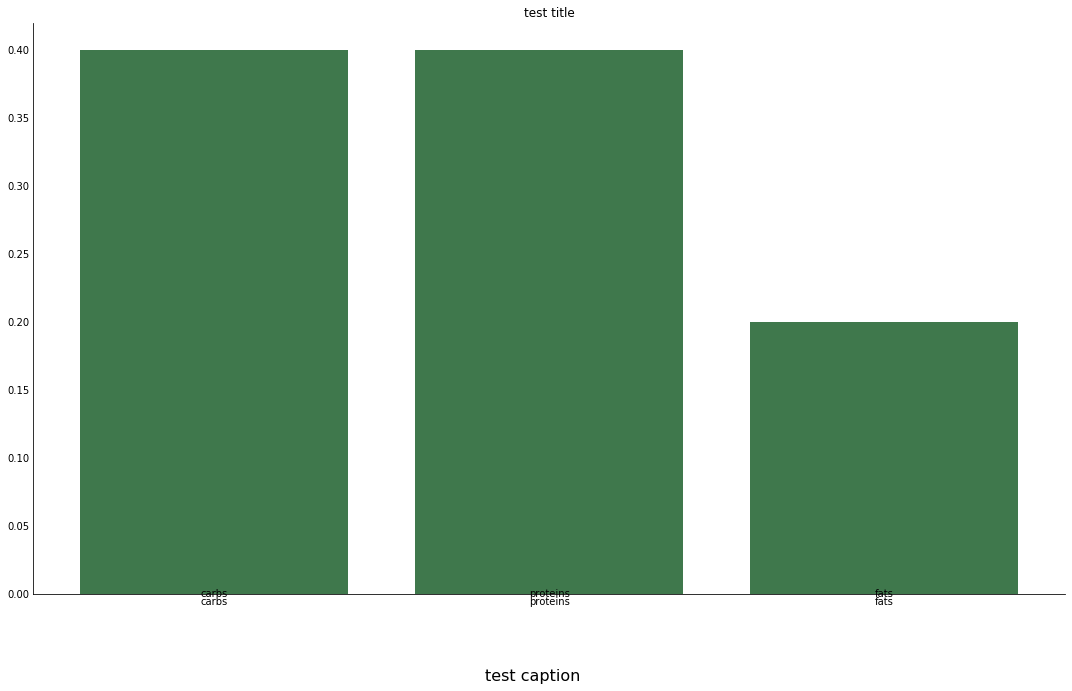

In [6]:
d = data_story()
d.bar(x=['carbs','proteins','fats'],y=[0.4,0.4,0.2])
# d.highlight(['fats','proteins'], filled=False)
d.display_x_values(inside_data=False, top_of_data=False, hide_ticks=False)
d.caption('test caption')
d.title('test title')

In [5]:
## Input: AxFract Points

## Output: Interpolated Points
def ax_interpolate(ax_points, num_interpolate=10):    
    interpolate_points = []
    for i in range(len(ax_points)-1):
        a = ax_points[i]
        b = ax_points[i+1]

        dx = (-1)*(a[0] - b[0]) / num_interpolate
        dy = (-1)*(a[1] - b[1] ) / num_interpolate

        new_x = a[0]
        new_y = a[1]

        for i in range(num_interpolate):
            new_x += dx
            new_y += dy
            interpolate_points.append((new_x,new_y))
            
    return(interpolate_points)

# Input: Plots

# Output: List of interpol points per plot

def interpolate_plot(plots):
    ax = plt.gca()
    plot_list = []
    for plot in plots:
        
        if type(plot) == matplotlib.lines.Line2D:
            x, y = plot.get_data()
            ax_points = [ax.transLimits.transform((xi,yi)) for xi,yi in zip(x,y)]
        elif type(plot) == matplotlib.patches.Rectangle:
            
            ax_points = []
            
            x = [i.get_x()+i.get_width()/2 for i in plot.patches]
            y = [i.get_height() for i in plot.patches]
            z = [p.get_width() for p in ax.patches]
            
            for i in range(len(x)):
                    # left bot edge
                    a1 = ax.transLimits.transform((x[i]-z[i]/2,0))

                    # left top edge
                    a2 = ax.transLimits.transform((x[i]-z[i]/2,y[i]))

                    # right top edge
                    a3 = ax.transLimits.transform((x[i]+z[i]/2,y[i]))

                    # right bot edge
                    a4 = ax.transLimits.transform((x[i]+z[i]/2,0))

                    ax_points.append(a1)
                    ax_points.append(a2)
                    ax_points.append(a3)
                    ax_points.append(a4)
        else:
            raise ValueError("Unknown Plot Type {}-- it's not a line or bar plot!".format(type(plot)))
        
        
        plot_list.append(ax_interpolate(ax_points))

    return(plot_list)